<a href="https://colab.research.google.com/github/sakagamiyoshiaki/DadosCDM/blob/master/Lista_CDM_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 10 - Consistência de Dados 

In [0]:
#Lista Exercício 10 - Pandas - Consistência
#Cheat Sheet - Pandas Basics
#Por: Yoshi
#Data: Abril/2020

#Principais bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#!pip install mpld3
#import mpld3
#mpld3.enable_notebook()

#Abrir o arquivo csv 
#uri='https://raw.githubusercontent.com/sakagamiyoshiaki/CDM/master/InmetFloripa2020.txt'
uri='https://raw.githubusercontent.com/sakagamiyoshiaki/CDM/master/IFSC-032010.txt'

df = pd.read_csv(uri,header=None); # Faz a leitura sem  e sem index

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2010,3,1,0,0,21.19,72.1,1014.7,0.0,2.422,181.5
1,2010,3,1,0,5,21.12,72.5,1014.7,0.0,3.397,193.8
2,2010,3,1,0,10,21.12,73.2,1014.6,0.0,2.950,188.1
3,2010,3,1,0,15,21.12,73.0,1014.6,0.0,2.754,192.0
4,2010,3,1,0,20,21.05,73.4,1014.6,0.0,3.986,203.1


# 01) Dataframe - Inserir Cabeçalho e indexando o tempo

---




In [0]:
df.columns=['year','month','day','hour','minute','tp','rh','pre','chuva','vel','dir']
df.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'tp', 'rh', 'pre', 'chuva',
       'vel', 'dir'],
      dtype='object')

In [0]:
df.head()

,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
0,2010,3,1,0,0,21.19,72.1,1014.7,0.0,2.422,181.5
1,2010,3,1,0,5,21.12,72.5,1014.7,0.0,3.397,193.8
2,2010,3,1,0,10,21.12,73.2,1014.6,0.0,2.950,188.1
3,2010,3,1,0,15,21.12,73.0,1014.6,0.0,2.754,192.0
4,2010,3,1,0,20,21.05,73.4,1014.6,0.0,3.986,203.1


In [0]:
df.index


RangeIndex(start=0, stop=8928, step=1)

In [0]:
df['date']=pd.to_datetime(df[['year', 'month', 'day', 'hour','minute']])
df.index=df['date']
df=df.drop(['date'],axis=1)
df.head()

,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
date,,,,,,,,,,,
2010-03-01 00:00:00,2010,3,1,0,0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,2010,3,1,0,5,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2010,3,1,0,10,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,2010,3,1,0,15,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,2010,3,1,0,20,21.05,73.4,1014.6,0.0,3.986,203.1


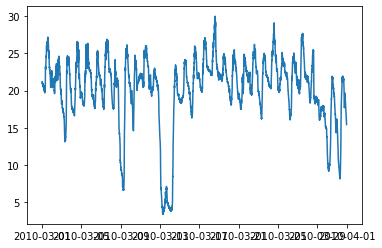

In [0]:
plt.plot(df.tp)

# 02) Dataframe - Identificar dados vazios na série

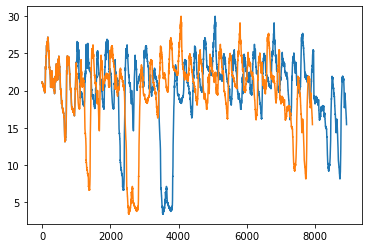

In [0]:
df = pd.read_csv(uri,header=None); # Faz a leitura sem  e sem index
df.columns=['year','month','day','hour','minute','tp','rh','pre','chuva','vel','dir'] # define o nome das colunas
plt.plot(df.tp)                  # gráfico com a série completa
df2=df.drop(range(1000,2000,1))  # exclusão de 1000 linhas 
df2=df2.reset_index()            # reset no index do dataframe
plt.plot(df2.tp)                 # gráfico com a série imcompleta

In [0]:
df2['date']=pd.to_datetime(df2[['year', 'month', 'day', 'hour','minute']])
df2.index=df2['date']
df2=df2.drop(['date'],axis=1)
df2.head()

,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
date,,,,,,,,,,,,
2010-03-01 00:00:00,0,2010,3,1,0,0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,1,2010,3,1,0,5,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2,2010,3,1,0,10,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,3,2010,3,1,0,15,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,4,2010,3,1,0,20,21.05,73.4,1014.6,0.0,3.986,203.1


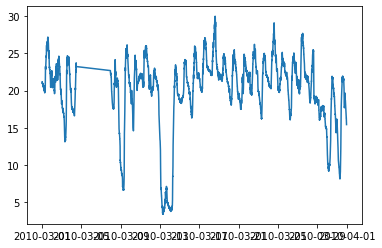

In [0]:
plt.plot(df2.tp) # faz o gráfico com os dados vazios na série

In [0]:
#df2['2010-03-04 10:00:00':'2010-03-08 13:00:00'].tp
df2['tp'].to_csv('saida.txt') # ver a saída de dados com linhas vazias


# 03) Dataframe - Preencher timestamp da série temporal - Reindexar


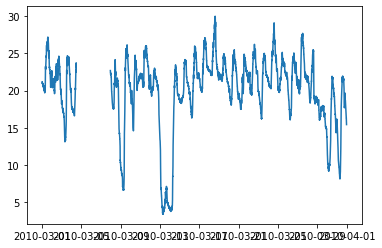

In [0]:
dt=pd.date_range(start='2010-03-01 00:00:00',end='2010-03-31 23:55:00',freq='05min'); # criar uma série temporal inteira
idx=pd.DatetimeIndex(dt)
df2 = df2.reindex(idx)

plt.plot(df2.tp)
df2['tp'].to_csv('saida2.txt') # ver a saída de dados com linhas vazias


# 04) Dataframe - Dados duplicados - Caso 01

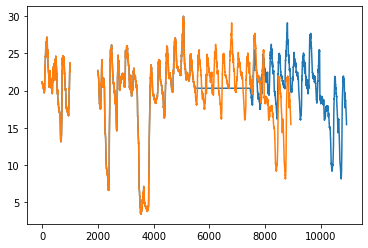

In [0]:
df3=df2.copy()
df4=pd.concat([df3.loc['2010-03-20 00:00:00':'2010-03-20 00:00:00',:]]*2000, ignore_index=False) # replicando linhas
df5=pd.concat([df4,df3],axis=0)
df5=df5.sort_index()
df5.head(15)
plt.plot(np.arange(0,len(df5),1),df5.tp)
plt.plot(np.arange(0,len(df2),1),df2.tp)


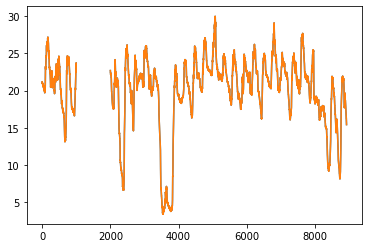

In [0]:
df6=df5.loc[~df5.index.duplicated(keep='last')] # separa apenas os dados não duplicados
plt.plot(np.arange(0,len(df6),1),df6.tp)
plt.plot(np.arange(0,len(df2),1),df2.tp)


# 05) Dataframe - Dados duplicados - Caso 02

In [0]:
df2.head(10)

,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
2010-03-01 00:00:00,0.0,2010.0,3.0,1.0,0.0,0.0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,1.0,2010.0,3.0,1.0,0.0,5.0,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2.0,2010.0,3.0,1.0,0.0,10.0,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,4.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,5.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:30:00,6.0,2010.0,3.0,1.0,0.0,30.0,21.09,73.6,1014.6,0.0,2.878,193.4
2010-03-01 00:35:00,7.0,2010.0,3.0,1.0,0.0,35.0,20.95,73.5,1014.4,0.0,2.802,194.8
2010-03-01 00:40:00,8.0,2010.0,3.0,1.0,0.0,40.0,21.09,73.5,1014.4,0.0,2.740,193.4
2010-03-01 00:45:00,9.0,2010.0,3.0,1.0,0.0,45.0,20.92,73.3,1014.3,0.0,2.514,192.2


In [0]:
df3=df2.loc['2010-03-01 00:15:00':'2010-03-01 00:30:00'].copy()
df4=pd.concat([df3,df2],axis=0)
df4.head(15)


,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,4.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,5.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:30:00,6.0,2010.0,3.0,1.0,0.0,30.0,21.09,73.6,1014.6,0.0,2.878,193.4
2010-03-01 00:00:00,0.0,2010.0,3.0,1.0,0.0,0.0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,1.0,2010.0,3.0,1.0,0.0,5.0,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2.0,2010.0,3.0,1.0,0.0,10.0,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,4.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,5.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9


In [0]:
df4=df4.sort_index()
df4.head(15)

,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
2010-03-01 00:00:00,0.0,2010.0,3.0,1.0,0.0,0.0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,1.0,2010.0,3.0,1.0,0.0,5.0,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2.0,2010.0,3.0,1.0,0.0,10.0,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,4.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:20:00,4.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,5.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:25:00,5.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:30:00,6.0,2010.0,3.0,1.0,0.0,30.0,21.09,73.6,1014.6,0.0,2.878,193.4


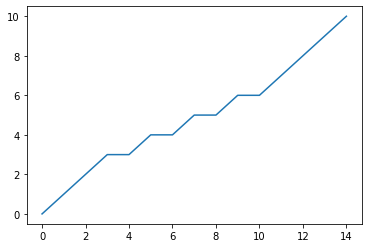

In [0]:
plt.plot(np.arange(0,15,1),df4.loc['2010-03-01 00:00:00':'2010-03-01 00:50:00','index'])

In [0]:
len(df4.loc['2010-03-01 00:00:00':'2010-03-01 00:50:00','index']) # saber o comprimento do dataframe

15

In [0]:
df4.loc['2010-03-01 00:00:00':'2010-03-01 00:50:00','index']=np.arange(0,15,1)
df4.head(15)

,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
2010-03-01 00:00:00,0.0,2010.0,3.0,1.0,0.0,0.0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,1.0,2010.0,3.0,1.0,0.0,5.0,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2.0,2010.0,3.0,1.0,0.0,10.0,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:15:00,4.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,5.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:20:00,6.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,7.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:25:00,8.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:30:00,9.0,2010.0,3.0,1.0,0.0,30.0,21.09,73.6,1014.6,0.0,2.878,193.4


In [0]:
df4.index.duplicated() # verificar se há indices duplicados
df4.loc[~df4.index.duplicated(keep='first')].head(15) # mantenha o primeiro

,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
2010-03-01 00:00:00,0.0,2010.0,3.0,1.0,0.0,0.0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,1.0,2010.0,3.0,1.0,0.0,5.0,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2.0,2010.0,3.0,1.0,0.0,10.0,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,5.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,7.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:30:00,9.0,2010.0,3.0,1.0,0.0,30.0,21.09,73.6,1014.6,0.0,2.878,193.4
2010-03-01 00:35:00,11.0,2010.0,3.0,1.0,0.0,35.0,20.95,73.5,1014.4,0.0,2.802,194.8
2010-03-01 00:40:00,12.0,2010.0,3.0,1.0,0.0,40.0,21.09,73.5,1014.4,0.0,2.740,193.4
2010-03-01 00:45:00,13.0,2010.0,3.0,1.0,0.0,45.0,20.92,73.3,1014.3,0.0,2.514,192.2


In [0]:
df4.loc[df4.index.duplicated(keep='last')] # mantenha o último

,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
2010-03-01 00:15:00,3.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,5.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,7.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:30:00,9.0,2010.0,3.0,1.0,0.0,30.0,21.09,73.6,1014.6,0.0,2.878,193.4


In [0]:
df5=df4.loc[~df4.index.duplicated(keep='last')] # separa apenas os dados não duplicados
df5.head(15)

,index,year,month,day,hour,minute,tp,rh,pre,chuva,vel,dir
2010-03-01 00:00:00,0.0,2010.0,3.0,1.0,0.0,0.0,21.19,72.1,1014.7,0.0,2.422,181.5
2010-03-01 00:05:00,1.0,2010.0,3.0,1.0,0.0,5.0,21.12,72.5,1014.7,0.0,3.397,193.8
2010-03-01 00:10:00,2.0,2010.0,3.0,1.0,0.0,10.0,21.12,73.2,1014.6,0.0,2.950,188.1
2010-03-01 00:15:00,4.0,2010.0,3.0,1.0,0.0,15.0,21.12,73.0,1014.6,0.0,2.754,192.0
2010-03-01 00:20:00,6.0,2010.0,3.0,1.0,0.0,20.0,21.05,73.4,1014.6,0.0,3.986,203.1
2010-03-01 00:25:00,8.0,2010.0,3.0,1.0,0.0,25.0,21.09,72.8,1014.6,0.0,2.765,198.9
2010-03-01 00:30:00,10.0,2010.0,3.0,1.0,0.0,30.0,21.09,73.6,1014.6,0.0,2.878,193.4
2010-03-01 00:35:00,11.0,2010.0,3.0,1.0,0.0,35.0,20.95,73.5,1014.4,0.0,2.802,194.8
2010-03-01 00:40:00,12.0,2010.0,3.0,1.0,0.0,40.0,21.09,73.5,1014.4,0.0,2.740,193.4
2010-03-01 00:45:00,13.0,2010.0,3.0,1.0,0.0,45.0,20.92,73.3,1014.3,0.0,2.514,192.2


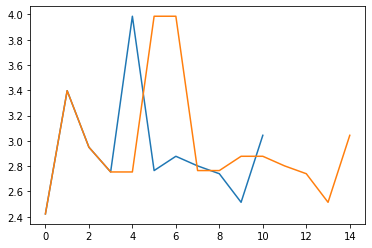

In [0]:
plt.plot(np.arange(0,11,1),df5.loc['2010-03-01 00:00:00':'2010-03-01 00:50:00','vel'])
plt.plot(np.arange(0,15,1),df4.loc['2010-03-01 00:00:00':'2010-03-01 00:50:00','vel'])

# 06) Dataframe - Remover dados ruins manualmente

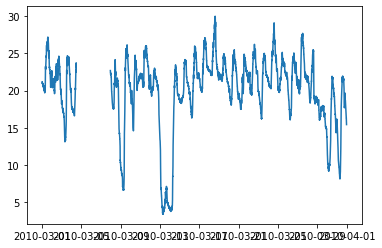

In [0]:
#!pip install mpld3
#import mpld3
#mpld3.enable_notebook()

df6=df5.copy()
plt.plot(df6.tp)

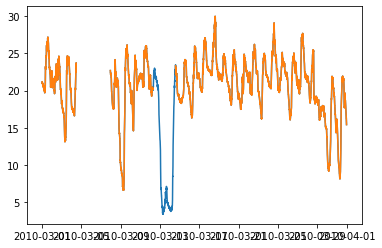

In [0]:
#df6.loc['2010-03-12 07:00:00':'2010-03-14 11:30:00','tp']=np.nan
#df6['2010-03-12 07:00:00':'2010-03-14 11:30:00'].tp=np.nan
df6.tp['2010-03-12 07:00:00':'2010-03-14 14:00:00']=np.nan

plt.plot(df5.tp)
plt.plot(df6.tp)

df6['tp'].to_csv('saida3.txt') # ver a saída de dados com linhas vazias


In [0]:
df6.tp['2010-03-12 06:50:00':'2010-03-14 14:10:00']

2010-03-12 06:50:00    20.22
2010-03-12 06:55:00    20.19
2010-03-12 07:00:00      NaN
2010-03-12 07:05:00      NaN
2010-03-12 07:10:00      NaN
                       ...  
2010-03-14 13:50:00      NaN
2010-03-14 13:55:00      NaN
2010-03-14 14:00:00      NaN
2010-03-14 14:05:00    23.36
2010-03-14 14:10:00    22.73
Name: tp, Length: 665, dtype: float64

# 07) Dataframe - Preencher a série - Interpolação

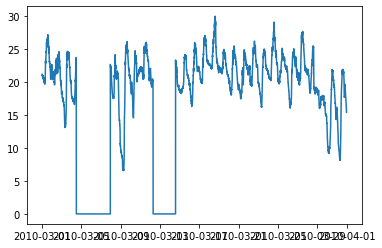

In [0]:
df7=df6.fillna(0) # preencher com zero todo o dataframe
plt.plot(df7.tp)

df7['tp'].to_csv('saida4.txt') # ver a saída de dados com linhas vazias
#df7['2010-03-12 06:50:00':'2010-03-14 14:10:00']

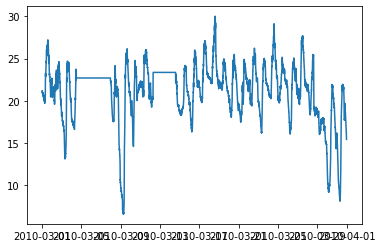

In [0]:
df8=df6.fillna(method='bfill') # preencher com os dados anterior
plt.plot(df8.tp)


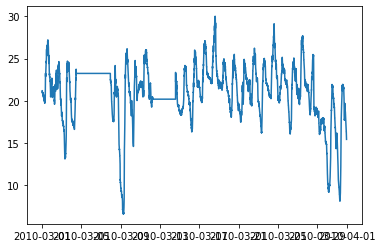

In [0]:
df9=df6.fillna(method='ffill') # preencher com os dados posterior
plt.plot(df9.tp)

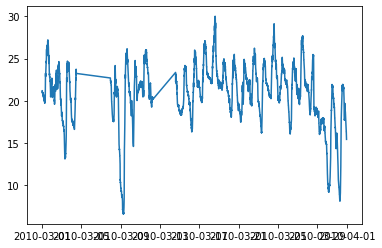

In [0]:
df10=df6.interpolate() # preencher fazendo interpolação
plt.plot(df10.tp)

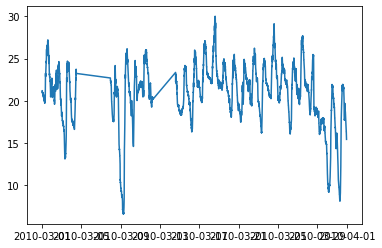

In [0]:
df10=df6.interpolate(method='time') # fazendo a interpolação com o tempo
plt.plot(df10.tp)

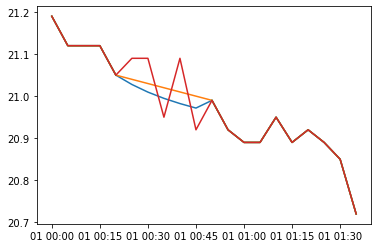

In [0]:
df11=df10.iloc[0:20,:]

df12.iloc[5:10,:]=np.ones(1)*(-9999)
df12=df12.replace(-9999,np.nan) # substitui dados inválidos por NaN

df13=df12.interpolate(method='time')
df14=df12.interpolate(method='spline', order=3)

plt.plot(df14.tp)
plt.plot(df13.tp)
plt.plot(df12.tp)
plt.plot(df11.tp)


# 08) Dataframe - Resumo dados ruins e bons (Percentual)

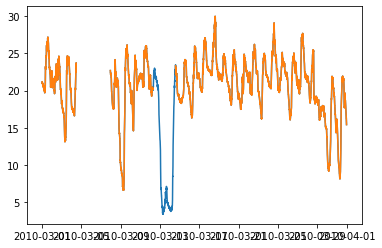

In [0]:
plt.plot(df2.tp) # antes 
plt.plot(df6.tp) # depois


In [0]:
df2.count()

index     7928
year      7928
month     7928
day       7928
hour      7928
minute    7928
tp        7928
rh        7928
pre       7928
chuva     7928
vel       7928
dir       7928
dtype: int64

In [0]:
df2.isna().sum()

index     1000
year      1000
month     1000
day       1000
hour      1000
minute    1000
tp        1000
rh        1000
pre       1000
chuva     1000
vel       1000
dir       1000
dtype: int64

In [0]:
df6.isna().sum()

index     1000
year      1000
month     1000
day       1000
hour      1000
minute    1000
tp        1661
rh        1000
pre       1000
chuva     1000
vel       1000
dir       1000
dtype: int64

In [0]:
flag=pd.DataFrame(df2.count(),columns=['total'])

flag

,total
index,7928
year,7928
month,7928
day,7928
hour,7928
minute,7928
tp,7928
rh,7928
pre,7928
chuva,7928


In [0]:
flag['vazio']=df2.isna().sum()

flag

,total,vazio
index,7928,1000
year,7928,1000
month,7928,1000
day,7928,1000
hour,7928,1000
minute,7928,1000
tp,7928,1000
rh,7928,1000
pre,7928,1000
chuva,7928,1000


In [0]:
flag['removido']=df6.isna().sum()-df2.isna().sum()
flag

,total,vazio,removido
index,7928,1000,0
year,7928,1000,0
month,7928,1000,0
day,7928,1000,0
hour,7928,1000,0
minute,7928,1000,0
tp,7928,1000,661
rh,7928,1000,0
pre,7928,1000,0
chuva,7928,1000,0


In [0]:
flag['validos']=flag['total']-(flag['vazio']+flag['removido'])

flag

,total,vazio,removido,validos
index,7928,1000,0,6928
year,7928,1000,0,6928
month,7928,1000,0,6928
day,7928,1000,0,6928
hour,7928,1000,0,6928
minute,7928,1000,0,6928
tp,7928,1000,661,6267
rh,7928,1000,0,6928
pre,7928,1000,0,6928
chuva,7928,1000,0,6928


In [0]:
flag['DadoBom']=100*(flag['validos']/flag['total']).round(2) 

flag

,total,vazio,removido,validos,DadoBom
index,7928,1000,0,6928,87.0
year,7928,1000,0,6928,87.0
month,7928,1000,0,6928,87.0
day,7928,1000,0,6928,87.0
hour,7928,1000,0,6928,87.0
minute,7928,1000,0,6928,87.0
tp,7928,1000,661,6267,79.0
rh,7928,1000,0,6928,87.0
pre,7928,1000,0,6928,87.0
chuva,7928,1000,0,6928,87.0


In [0]:
flag['DadoRuim']=100*((flag['total']-flag['validos'])/flag['total']).round(2) 

flag

,total,vazio,removido,validos,DadoBom,DadoRuim
index,7928,1000,0,6928,87.0,13.0
year,7928,1000,0,6928,87.0,13.0
month,7928,1000,0,6928,87.0,13.0
day,7928,1000,0,6928,87.0,13.0
hour,7928,1000,0,6928,87.0,13.0
minute,7928,1000,0,6928,87.0,13.0
tp,7928,1000,661,6267,79.0,21.0
rh,7928,1000,0,6928,87.0,13.0
pre,7928,1000,0,6928,87.0,13.0
chuva,7928,1000,0,6928,87.0,13.0
